<a href="https://colab.research.google.com/github/abi672003/HealthcareAnalytics-PneumoniaPrediction/blob/main/Pneumonia_X_ray_classification_using_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import vgg16
from tensorflow import keras

In [2]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/chest_xray/train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
validation_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/chest_xray/val',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/chest_xray/test',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [3]:
model=vgg16.VGG16(input_shape=(150,150,3),weights='imagenet',include_top=False, )

58889256/58889256 [==============================] - 0s 0us/step


In [4]:
model.trainable = False

In [5]:
inputs = keras.Input(shape=(150, 150, 3))
x = model(inputs, training=False)
x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(256,activation='relu')(x)
x=tf.keras.layers.Dense(1,activation='sigmoid')(x)
model_f = keras.Model(inputs, x)

In [6]:
model_f.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [7]:
history=model_f.fit(
        train_generator,

        epochs=3,
        validation_data=validation_generator
        )

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


163/163 [==============================] - 1591s 9s/step - loss: 0.2173 - binary_accuracy: 0.9151 - val_loss: 0.3346 - val_binary_accuracy: 0.8125
Epoch 2/3
163/163 [==============================] - 1494s 9s/step - loss: 0.1453 - binary_accuracy: 0.9423 - val_loss: 1.0151 - val_binary_accuracy: 0.6875
Epoch 3/3
163/163 [==============================] - 1462s 9s/step - loss: 0.1302 - binary_accuracy: 0.9502 - val_loss: 0.4651 - val_binary_accuracy: 0.7500


Text(0.5, 0, 'epoch')

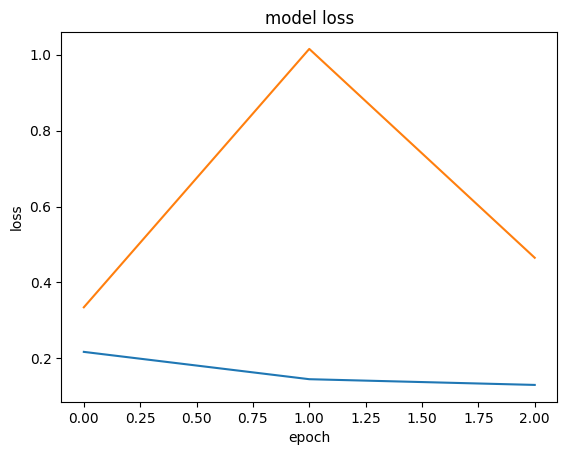

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [9]:
history.history.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

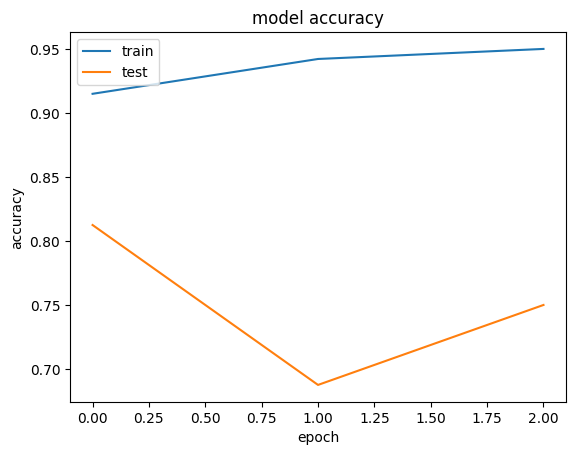

In [10]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
loss, accuracy = model_f.evaluate(test_generator)

20/20 [==============================] - 180s 9s/step - loss: 0.2647 - binary_accuracy: 0.9151


In [12]:
# get the predictions
predictions = model_f.predict(test_generator)

20/20 [==============================] - 175s 9s/step


In [13]:
# Print a classification report
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

test_labels = test_generator.classes
predictions = np.round(predictions)
print(classification_report(test_labels, predictions))


              precision    recall  f1-score   support

           0       0.34      0.28      0.31       234
           1       0.61      0.67      0.64       390

    accuracy                           0.53       624
   macro avg       0.48      0.48      0.47       624
weighted avg       0.51      0.53      0.52       624



In [14]:
import seaborn as sns

<Axes: title={'center': 'CONFUSION MATRIX'}>

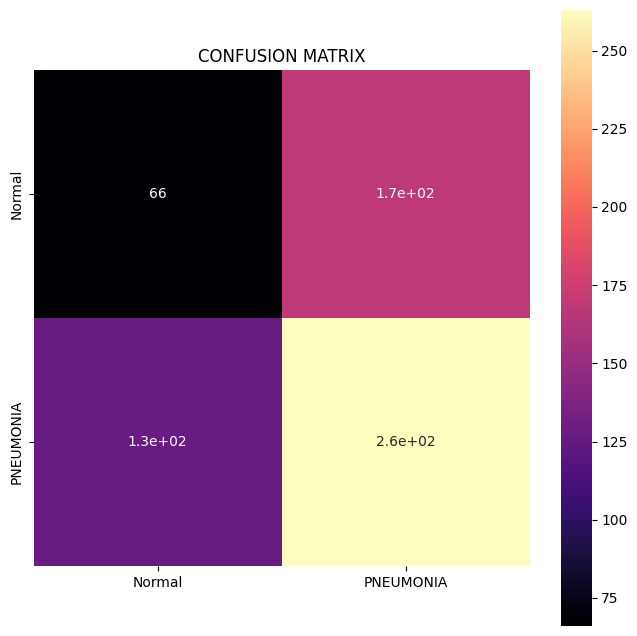

In [15]:
# Display the confusion matrix
conf_mat = confusion_matrix(test_labels, predictions)
plt.figure(figsize=(8,8))
plt.title('CONFUSION MATRIX')
sns.heatmap(conf_mat, annot=True,
            yticklabels=['Normal', 'PNEUMONIA'],
            xticklabels=['Normal', 'PNEUMONIA'],
            square=True, cmap='magma')

In [17]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np
from PIL import Image
import io

# Function for handling the uploaded image and making predictions
def on_file_upload(change):
    if len(file_upload.value) > 0:
        uploaded_image = list(file_upload.value.values())[0]['content']
        img = Image.open(io.BytesIO(uploaded_image))
        img = img.resize((150, 150))  # Resize the image to match the model input shape
        img_array = np.array(img) / 255.0  # Normalize the image
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        prediction = model_f.predict(img_array)
        if prediction[0][0] > 0.5:
            result.value = "Prediction: PNEUMONIA"
        else:
            result.value = "Prediction: NORMAL"

# Create the upload button
file_upload = widgets.FileUpload(accept='.png, .jpg, .jpeg', multiple=False)

# Create the predict button
predict_button = widgets.Button(description='Predict')
result = widgets.Label()

# Define the event handler for the predict button
def on_predict_button_clicked(b):
    clear_output()
    display(file_upload)
    display(predict_button)
    display(result)

# Bind the event handler to the predict button
predict_button.on_click(on_file_upload)

# Display the elements
display(file_upload)
display(predict_button)
display(result)

FileUpload(value={}, accept='.png, .jpg, .jpeg', description='Upload')

Button(description='Predict', style=ButtonStyle())

Label(value='')

1/1 [==============================] - 0s 252ms/step
